In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import plot_data, plot_data_3D, get_plottable_files

In [3]:
folders_to_look_into = ["/home/dg/Downloads/", "/home/doga/Downloads/", "../assets/plottable_run_examples"]
found_file_paths = get_plottable_files(folders_to_look_into)

idx(0):/home/dg/Downloads/runPositions_20230524_033038.txt
idx(1):/home/dg/GitHubUbuntU/runApp/assets/plottable_run_examples/runPositions_20230524_075040.txt


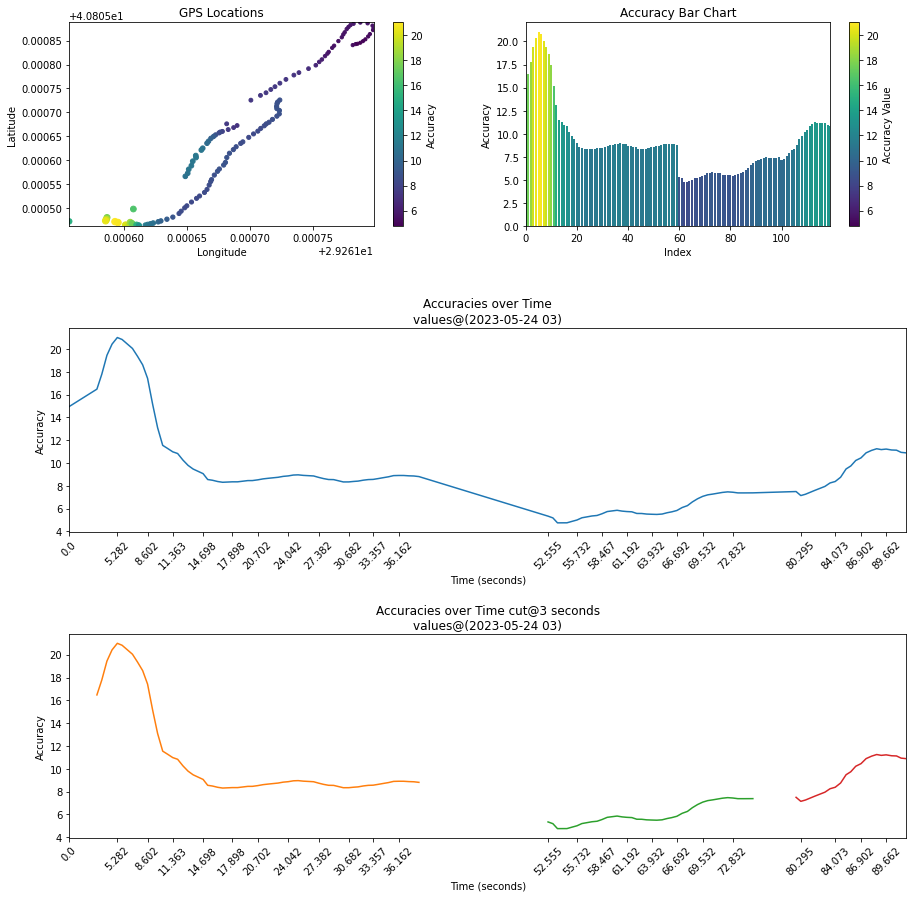

In [4]:
file_id = 0
file_path = found_file_paths[file_id]

figsize=(15, 15)
stride=5
threshold=3
hspace=0.5
all_data = plot_data(file_path, figsize, stride, threshold, hspace)

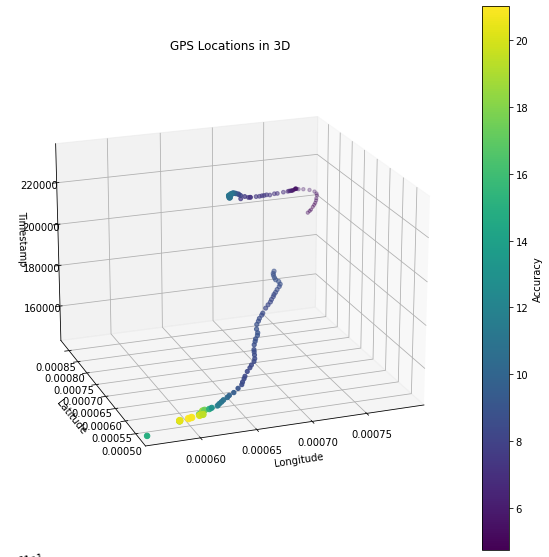

In [5]:
plot_data_3D(file_path, (10,10), elev=20, azim=-110)

In [6]:
all_data[0]

{'timestamp': 1684888144773,
 'mocked': False,
 'coords': {'altitude': 43.30000305175781,
  'heading': 55.56864547729492,
  'altitudeAccuracy': 1.4849402904510498,
  'latitude': 40.8054724,
  'speed': 0.21526417136192322,
  'longitude': 29.2615569,
  'accuracy': 14.954999923706055}}

In [7]:
import math
from datetime import datetime
from geo_funcs import calc_geodesic, calc_dif_geo, deg_dms,calc_pace_from_kmh

In [8]:
# Example usage
f = 10
t = 13
#
#Point 1: 50° 03′ 58.76″N, 005° 42′ 53.10″W
#Point 2: 58° 38′ 38.48″N, 003° 04′ 12.34″W
#P1 : 'latitude': 50.066322,'longitude': -5.71475,
#P2 : 'latitude': 58.644022,'longitude': -3.070094,
#Distance:969954.114 m
#Initial bearing:009° 08′ 30.70″ --9.141863:9 degrees, 8 minutes, 30.7068 seconds 
#Final bearing:	011° 17′ 49.92″ --11.29720:11 degrees, 17 minutes, 49.92 seconds

datapoint1 = {
    'timestamp': all_data[f]['timestamp'],
    'mocked': False,
    'coords': {
        'altitude': 43.30000305175781,
        'heading': 55.56864547729492,
        'altitudeAccuracy': 1.4849402904510498,
        'latitude': all_data[f]['coords']['latitude'],#50.066322,
        'speed': 0.21526417136192322,
        'longitude': all_data[f]['coords']['longitude'],#-5.71475,
        'accuracy': 14.954999923706055
    }
}

datapoint2 = {
    'timestamp': all_data[t]['timestamp'],
    'mocked': False,
    'coords': {
        'altitude': 45.30000305175781,
        'heading': 60.56864547729492,
        'altitudeAccuracy': 1.4849402904510498,
        'latitude': all_data[t]['coords']['latitude'],#58.644022,
        'speed': 0.21526417136192322,
        'longitude': all_data[t]['coords']['longitude'],#-3.070094,
        'accuracy': 14.954999923706055
    }
}

In [9]:
s, α1, α2 = calc_geodesic(datapoint1, datapoint2)

Time Difference: 1.66 seconds
L(difference in longitude)=1.8675022983583034e-07
λ<init=L>(difference in longitude on an auxiliary sphere)=1.8675022983583034e-07
σ(angular distance P₁ P₂ on the sphere)=None
s_geo_len(length of the geodesic)=0.9966328205396167
α1(initial bearing)=2.008009283116535 radians
α2(final bearing)=2.0080094052157924 radians
s(length of the geodesic)=0.997 meters
α1(initial bearing)=115 degrees 3 minutes 1.65 seconds
α2(final bearing)=115 degrees 3 minutes 1.67 seconds
Kilometers per hour: 2.1613723818931447
Pace: 27 minutes 45 seconds per kilometer


In [10]:
latitude, longitude, final_bearing = calc_dif_geo(datapoint1, s, α1, α2)
print(f"Latitude: {math.degrees(latitude)} degrees")
print(f"Longitude: {math.degrees(longitude)} degrees")
print(f"Final Bearing: {math.degrees(final_bearing)} degrees")

Latitude: 40.80546475175968 degrees
Longitude: 29.261617658195778 degrees
Final Bearing: 6411.720455078753 degrees
